In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import requests
import json

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from prophet.plot import plot_plotly, plot_components_plotly

from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics


In [4]:
raw_data = pd.read_csv('/content/drive/MyDrive/Data Science/Projects/ods/ods032-api.csv')

In [7]:
df = raw_data.copy()
df = df.rename(columns={'Datetime':'ds',
                        'datetime':'ds',
                        'Region':'region',
                        'Measured & Upscaled':'y',
                        'measured':'y',
                        'Most recent forecast':'forecast_recent',
                        'Week-ahead forecast':'forecast_week',
                        'Day-ahead 6PM forecast':'forecast_day',
                        'mostrecentforecast':'forecast_recent',
                        'dayaheadforecast':'forecast_day',
                        'weekaheadforecast':'forecast_week'})
df['ds'] = pd.to_datetime(df.ds, utc=True)
df.set_index("ds", inplace=True)
df = df.sort_index()
df = df.ffill().bfill()
df = df[df.region == 'Belgium'].drop(['region'], axis=1)
# df = df[['y']]['2019-01-01':'2023-12-31'].copy()
df = df[['y']]['2022-02-26':'2022-03-04'].copy()
df.reset_index(inplace=True)
df['ds'] = df['ds'].dt.tz_localize(None)
df['floor'] = 0

samples_per_day = 96
days_to_predict = 7

In [8]:
m = Prophet(daily_seasonality=True, yearly_seasonality=True)
m.fit(df)

future = m.make_future_dataframe(periods=samples_per_day*days_to_predict, freq="15min")
future['floor'] = 0

forecast = m.predict(future)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp87gzj7ea/rupcm03u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp87gzj7ea/1uz42nwp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61644', 'data', 'file=/tmp/tmp87gzj7ea/rupcm03u.json', 'init=/tmp/tmp87gzj7ea/1uz42nwp.json', 'output', 'file=/tmp/tmp87gzj7ea/prophet_model8n8ldik5/prophet_model-20241107165914.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:59:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:59:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [9]:
# plt.figure(figsize=(20, 7))
# plt.plot(df['ds'], df['y'], label='Historical Data', color='blue')
# plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='orange')
# plt.title('Solar Energy Generation Forecast')
# plt.xlabel('Date')
# plt.ylabel('Energy Generation')
# plt.legend()
# plt.grid()
# plt.show()

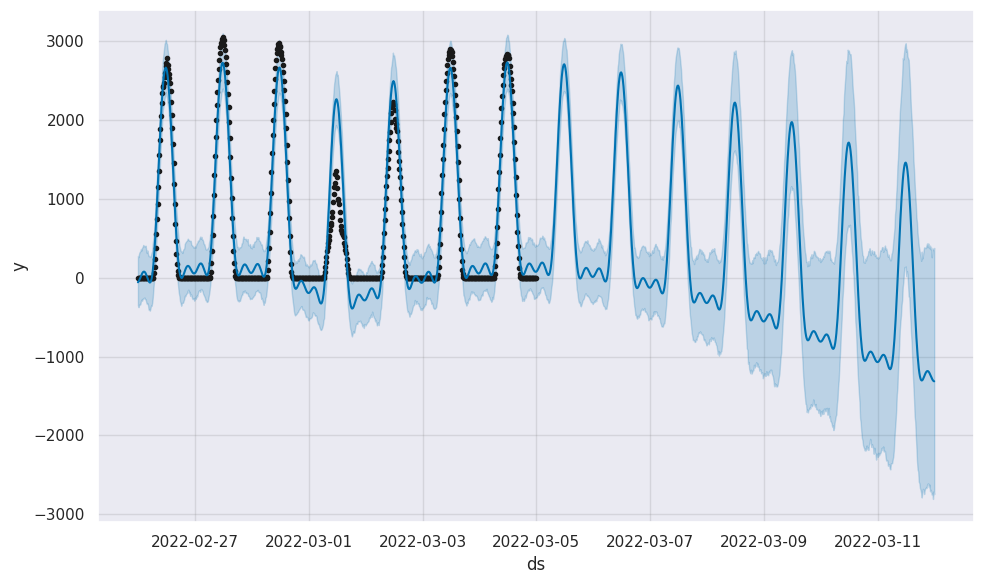

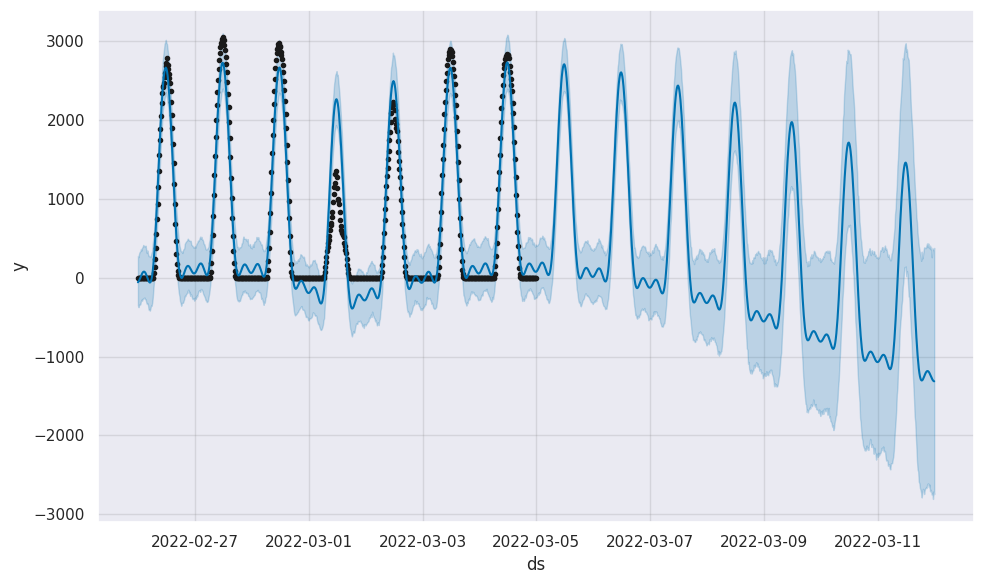

In [10]:
m.plot(forecast)

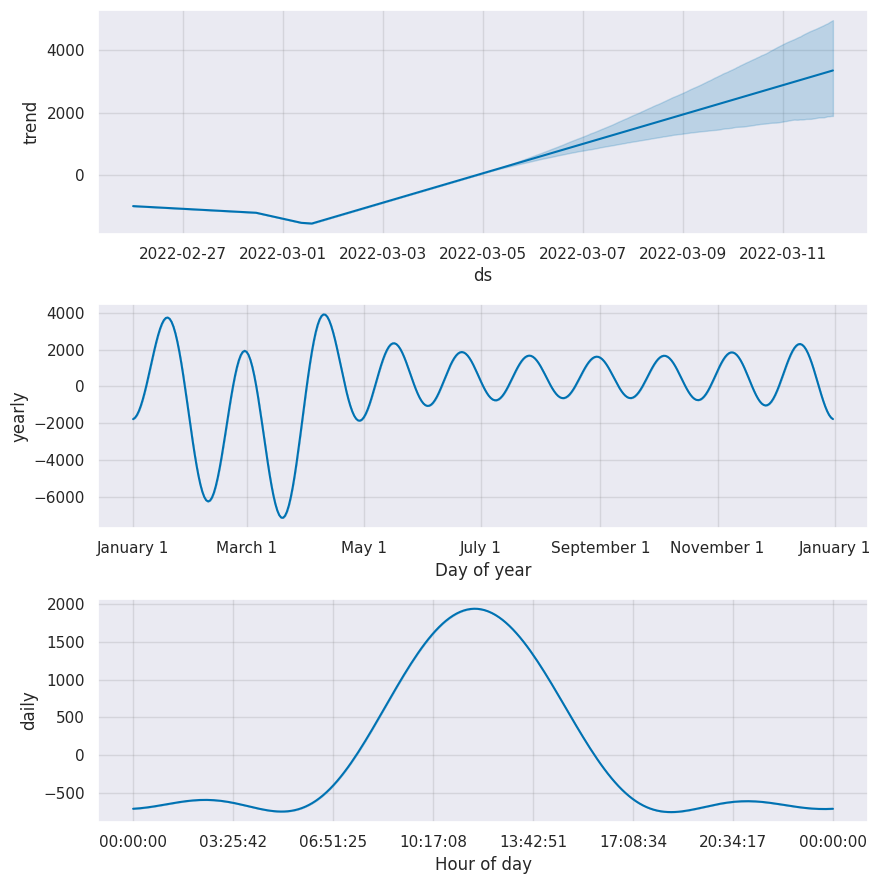

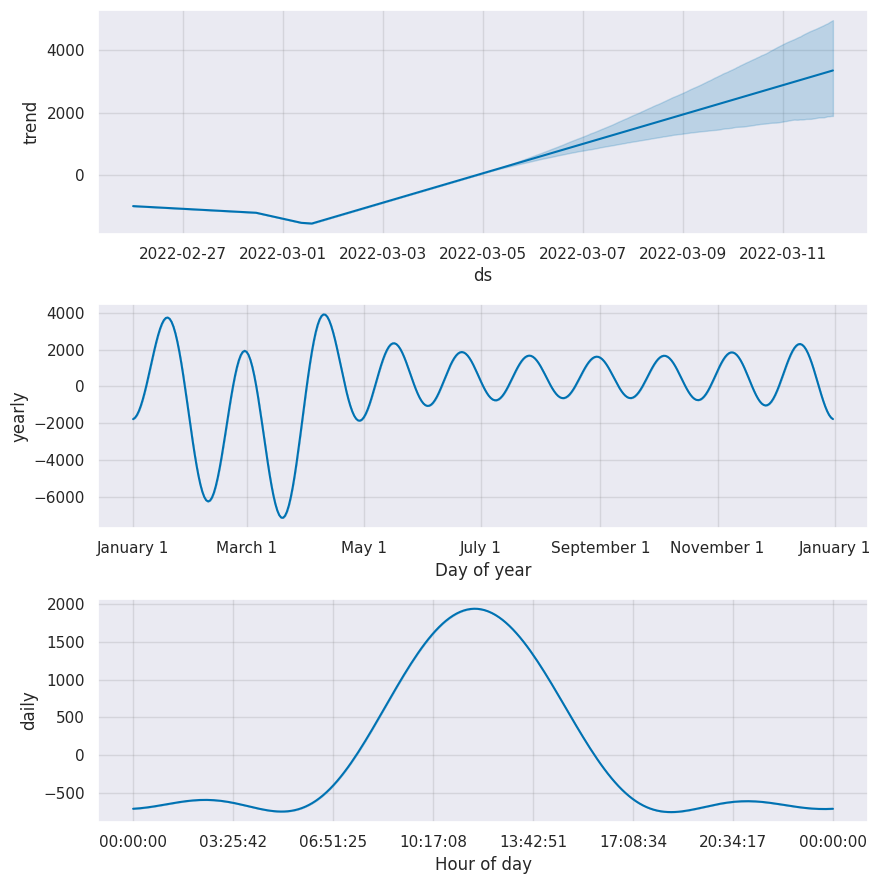

In [11]:
m.plot_components(forecast)

In [12]:
# plot_plotly(m, forecast)

In [13]:
# plot_components_plotly(m, forecast)